In [31]:
import pandas as pd 
import numpy as np
from processador_ibovespa import ProcessadorIbovespa
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [32]:
caminho_arquivo = "../../dados/investimento/ibovespa.csv"

df = pd.read_csv(caminho_arquivo, sep = ',')

In [33]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.03.2021,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,10.03.2021,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,09.03.2021,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,08.03.2021,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,05.03.2021,115.202,112.690,115.504,112.504,"13,25M","2,23%"


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4999 non-null   object 
 1   Último    4999 non-null   float64
 2   Abertura  4999 non-null   float64
 3   Máxima    4999 non-null   float64
 4   Mínima    4999 non-null   float64
 5   Vol.      4998 non-null   object 
 6   Var%      4999 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.5+ KB


In [35]:
# Criando o índice a partir da coluna de data

df.index = pd.to_datetime(df.Data, format = "%d.%m.%Y")

In [36]:
df.drop(columns=['Data'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 2021-03-11 to 2000-12-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4999 non-null   float64
 1   Abertura  4999 non-null   float64
 2   Máxima    4999 non-null   float64
 3   Mínima    4999 non-null   float64
 4   Vol.      4998 non-null   object 
 5   Var%      4999 non-null   object 
dtypes: float64(4), object(2)
memory usage: 273.4+ KB


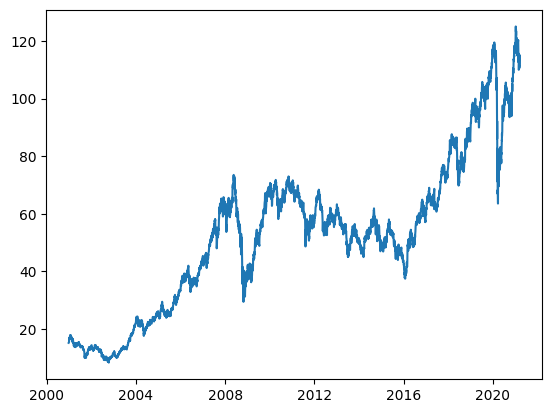

In [38]:
plt.plot(df.index,df.Último)

In [39]:
# Selecionando apenas a coluna Último do df

df_indice = df[['Último']]
df_indice.rename(columns={'Último':'fechamento'}, inplace=True)

C:\Users\Sergio Velloso\AppData\Local\Temp\ipykernel_7804\3962309895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indice.rename(columns={'Último':'fechamento'}, inplace=True)


In [40]:
df_indice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 2021-03-11 to 2000-12-27
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fechamento  4999 non-null   float64
dtypes: float64(1)
memory usage: 78.1 KB


In [41]:
df_indice = df_indice.asfreq('D').interpolate(method='linear')
#df_indice = df_indice.asfreq('D').fillna(method='ffill')


In [42]:
df_indice.head()

,fechamento
Data,
2000-12-27,15.1860
2000-12-28,15.2590
2000-12-29,15.2922
2000-12-30,15.3254
2000-12-31,15.3586


In [43]:
resultados = seasonal_decompose(df_indice)

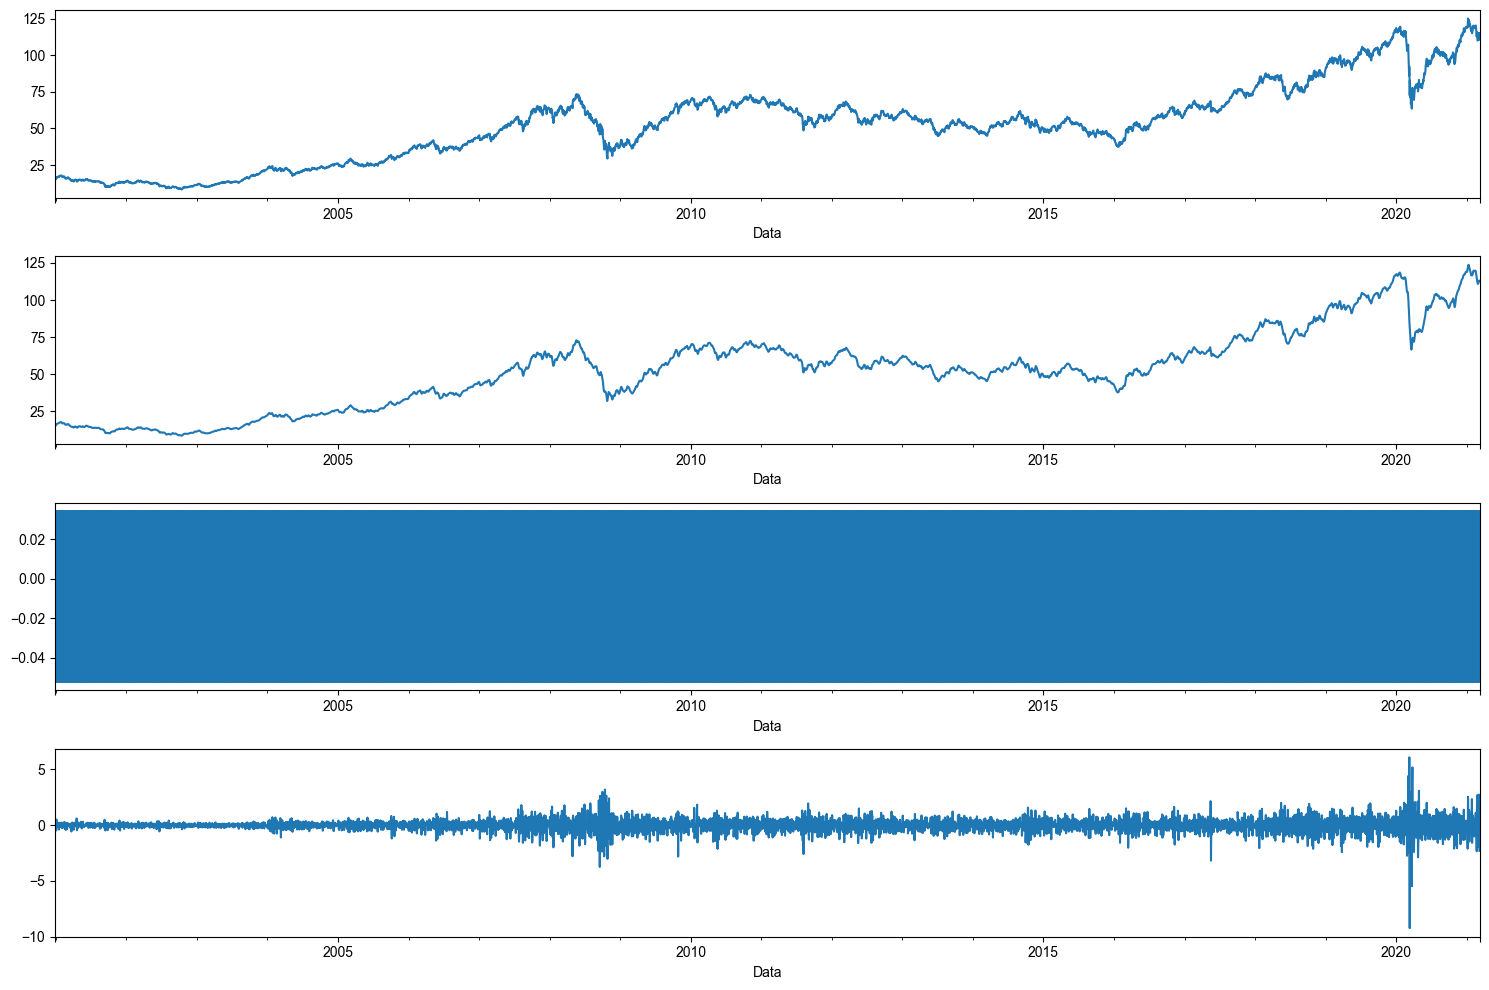

In [44]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize= (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)


plt.tight_layout()

In [47]:
# Verificando se existe estacionaridade

X = df_indice.fechamento.values
result = adfuller(X)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -0.7725878960110262
P-Value: 0.8270418677387847
Valores críticos:
	1%: -3.4312392854016696
	5%: -2.8619329956939263
	10%: -2.566979187311738


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

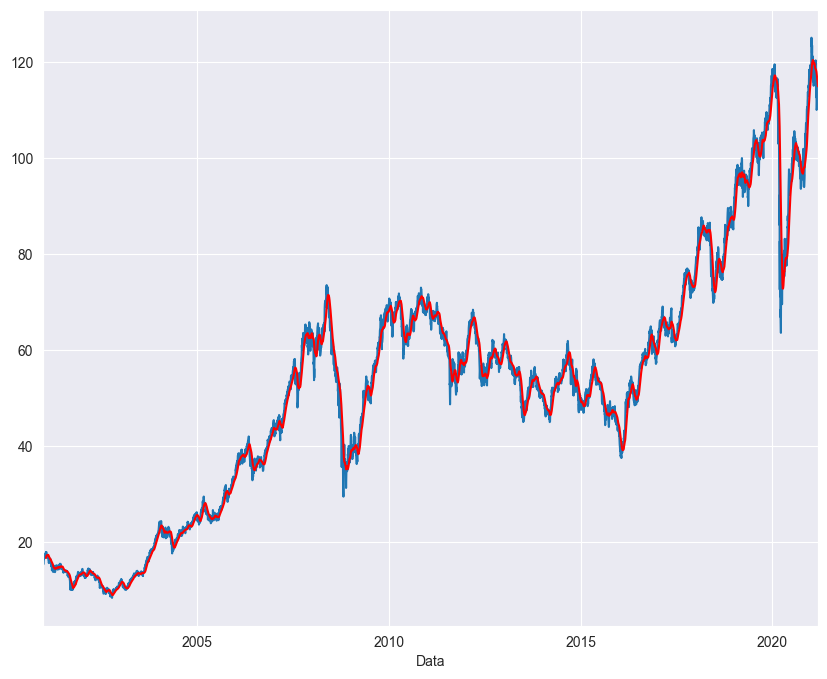

In [57]:
# Cálculo da média móvel para facilitar a visualização da tendência

ma = df_indice.rolling(30).mean()

f, ax = plt.subplots(figsize=(10,8))
df_indice.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') 
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

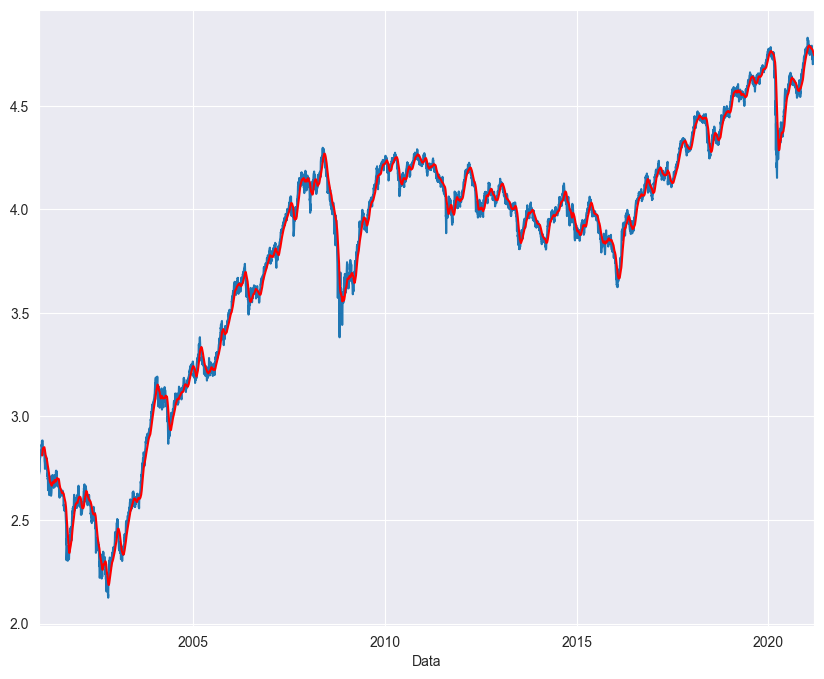

In [68]:
# Diferenciando buscando a estacionariedade

df_indice_log = np.log(df_indice)
ma_log = df_indice_log.rolling(30).mean()


f, ax = plt.subplots(figsize=(10,8))
df_indice_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r') 
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

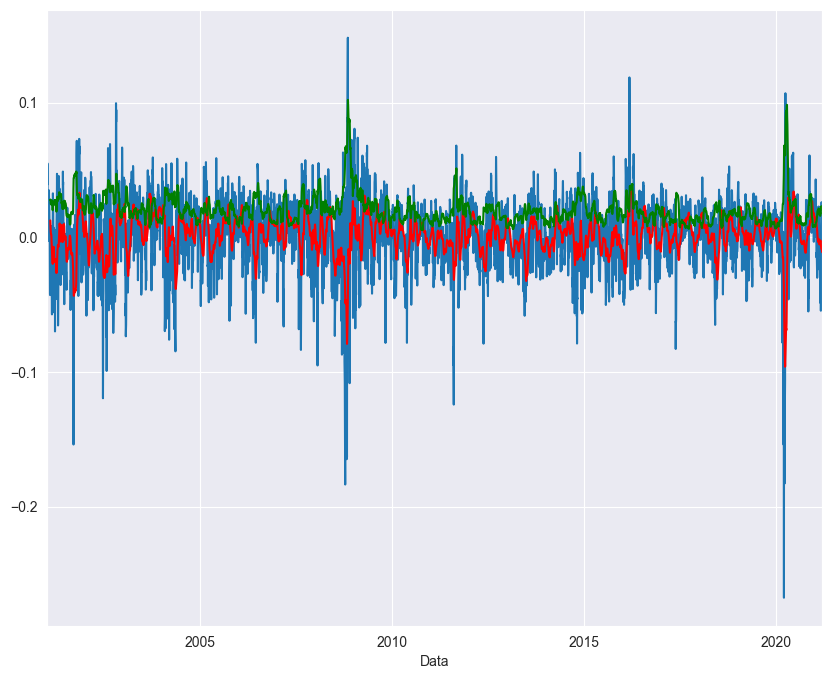

In [59]:
df_s = (df_indice_log - ma_log).dropna()

ma_s = df_s.rolling(30).mean()

std = df_s.rolling(30).std()

f, ax = plt.subplots(figsize=(10,8))
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r') 
std.plot(ax=ax, legend=False, color='g') 
plt.tight_layout

In [60]:
# Verificando novamente o teste de ADF

X_s = df_s.fechamento.values

In [61]:
result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste Estatístico: {result_s[0]}')
print(f'P-Value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -18.190095728676173
P-Value: 2.4205376553190625e-30
Valores críticos:
	1%: -3.431239164483364
	5%: -2.8619329422653372
	10%: -2.566979158870904
